# Оценка стоимости недвижимости с помощью нейронной сети


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

2 вариант

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/train.csv")

In [ ]:
rm -Rf /content/test_directory*

In [ ]:
import numpy as np

Данные

In [ ]:
data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Убираем столбец с ID

In [ ]:
data = data.drop(columns=['ID'])

In [ ]:
data

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Находим все столбцы с символами

In [ ]:
subdata = data.iloc[:, 1:9]

In [ ]:
subdata

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


Преобразуем в числа

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
subdata_encoded = subdata.apply(le.fit_transform)

In [ ]:
subdata_encoded

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [ ]:
subdata_2 = data.iloc[:,9:385]

In [ ]:
subdata_2

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Объединяем обратно в одну таблицу

In [ ]:
subdata_encoded.reset_index(drop=True, inplace=True)
subdata_2.reset_index(drop=True, inplace=True)

In [ ]:
data_2 = pd.concat([subdata_encoded,subdata_2], axis=1)

In [ ]:
data_2

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Нормализуем

In [ ]:
# Среднее значение
mmean = data_2.mean(axis=0)
# Стандартное отклонение
mstd = data_2.std(axis=0)
data_2  -= mmean
data_2 /= mstd
data_2

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.162993,1.393322,-0.028118,-1.678071,0.028935,1.291964,0.751698,0.339405,-0.116108,NaN,-0.284872,4.03065,-0.865143,-0.021801,-0.051183,-0.087517,11.247906,-0.332457,-0.408087,19.533195,-0.30857,-0.145263,-0.043633,-0.070803,-1.466267,-0.183402,-0.211955,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,-4.237357,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,-1.041363,-1.749861,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,1.475156,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
1,0.162993,1.158883,0.155369,0.620896,0.028935,1.776763,1.437340,0.339405,-0.116108,NaN,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,11.247906,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,1.461457,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
2,-0.710475,1.510542,1.531527,-0.528587,0.028935,1.655563,0.751698,1.618197,-0.116108,NaN,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,11.423670,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,11.423670,-0.04081,-0.021801,-0.037778
3,-0.710475,1.158883,1.531527,1.195637,0.028935,1.655563,1.437340,-1.081476,-0.116108,NaN,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,45.858481,-0.140062,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
4,-0.710475,1.393322,1.531527,1.195637,0.028935,-0.162435,-1.305229,0.197316,-0.116108,NaN,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187

In [ ]:
ydata = data.iloc[:,0]

In [ ]:
ydata

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

Убираем пустые столбцы

In [ ]:
data_2 = data_2.dropna(axis='columns')

In [ ]:
data_2.describe()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,...,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,...,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03
mean,-5.354604e-17,8.592688e-16,-5.217442e-16,-1.967751e-17,8.567712e-16,-8.871233e-16,2.678621e-17,-3.017570e-17,2.388272e-16,-2.697507e-15,-1.166394e-15,9.303294e-17,-2.305826e-16,4.492757e-16,1.812026e-15,-1.693690e-16,3.668827e-16,-1.770765e-15,4.086479e-16,-2.686587e-15,-1.653860e-16,-1.457184e-16,-1.289378e-15,-7.397266e-16,-5.166401e-16,1.437698e-16,2.785449e-17,-6.482500e-16,-5.367067e-16,-7.321357e-16,-2.960331e-16,-6.482500e-16,-4.259416e-16,-6.482500e-16,-5.547792e-15,-7.321357e-16,6.095428e-16,-6.162344e-16,-8.513482e-16,-6.614650e-16,...,2.032310e-16,1.837012e-15,-2.451644e-16,7.638356e-16,1.810344e-15,9.477385e-16,-5.123538e-16,-1.943879e-16,-7.481971e-16,-3.556195e-16,-8.432314e-16,-8.014760e-16,-9.347246e-16,5.027525e-17,1.197954e-15,2.158512e-15,2.989610e-16,1.292491e-17,1.091073e-15,1.763966e-15,1.763966e-15,2.536315e-16,1.580756e-15,-3.486295e-16,-8.358326e-17,2.347143e-15,-4.779775e-16,1.113828e-15,-4.982683e-16,1.194894e-16,-7.712740e-16,-4.532817e-15,-5.945457e-16,-4.019382e-16,-4.865304e-16,9.270982e-17,1.812026e-15,2.436740e-16,4.639497e-16,-2.900553e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.166255e+00,-1.302727e+00,-1.587763e+00,-1.678071e+00,-4.056648e+01,-1.616834e+00,-2.333693e+00,-1.649829e+00,-1.161078e-01,-2.848720e-01,-2.480400e-01,-8.651427e-01,-2.180104e-02,-5.118274e-02,-8.751674e-02,-8.888431e-02,-3.324573e-01,-4.080866e-01,-5.118274e-02,-3.085700e-01,-1.452627e-01,-4.363320e-02,-7.080350e-02,-1.466267e+00,-1.834023e-01,-2.119547e-01,-6.733148e-02,-5.501098e-01,-1.062542e-01,-1.541383e-02,-7.411613e-02,-5.501098e-0

Истинное время

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

Делим данные на тренировочные и тестовые

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_2, ydata, test_size=0.33, random_state=42)

In [ ]:
!pip install -q -U keras-tuner

Импортируем слои

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


Создаем модель

In [ ]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=128, # минимальное количество нейронов - 128
    max_value=2048, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  
  return model

In [ ]:
rm -Rf /content/test_directory_11

In [ ]:
tuner = RandomSearch(
  build_model, # функция создания модели
  objective='val_mae', # метрика, которую нужно оптимизировать доля правильных ответов на проверочном наборе данных
  max_trials=5, # максимальное количество запусков обучения
  directory='test_directory_11' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 2048, 'step': 32, 'sampling': None}


In [ ]:
tuner.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=20, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 07s]
val_mae: 6.365304470062256

Best val_mae So Far: 6.365304470062256
Total elapsed time: 00h 00m 43s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in test_directory_11/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 1376
Score: 6.365304470062256
Trial summary
Hyperparameters:
units_input: 1824
Score: 6.471414089202881
Trial summary
Hyperparameters:
units_input: 544
Score: 6.552987575531006
Trial summary
Hyperparameters:
units_input: 448
Score: 6.580042362213135
Trial summary
Hyperparameters:
units_input: 320
Score: 6.653210639953613


In [ ]:
models = tuner.get_best_models(num_models=3)

In [ ]:
for model in models:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1376)              502240    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1377      
Total params: 503,617
Trainable params: 503,617
Non-trainable params: 0
_________________________________________________________________
44/44 [==============================] - 0s 2ms/step - loss: 162.8560 - mae: 7.0696

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1824)              665760    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1825      
Total params: 667,585
Trainable params: 667,585
Non-trainable params: 0
_____

In [ ]:
def build_model2(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=512, # минимальное кол ичество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  return model

In [ ]:
rm -Rf /content/test_directory2_222

In [ ]:
tuner2 = BayesianOptimization(
  build_model2, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory2_222' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner2.search_space_summary()

Search space summary
Default search space size: 2
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}


In [ ]:
tuner2.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=20, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 11s]
val_mae: 6.085934162139893

Best val_mae So Far: 6.085934162139893
Total elapsed time: 00h 00m 54s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.results_summary()

Results summary
Results in test_directory2_222/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 512
units_hidden: 128
Score: 6.085934162139893
Trial summary
Hyperparameters:
units_input: 512
units_hidden: 128
Score: 6.099676609039307
Trial summary
Hyperparameters:
units_input: 576
units_hidden: 224
Score: 6.169093132019043
Trial summary
Hyperparameters:
units_input: 1024
units_hidden: 128
Score: 6.239354133605957
Trial summary
Hyperparameters:
units_input: 928
units_hidden: 512
Score: 6.282037258148193


In [ ]:
models2 = tuner2.get_best_models(num_models=3)

In [ ]:
for model in models2:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               186880    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 252,673
Trainable params: 252,673
Non-trainable params: 0
_________________________________________________________________
44/44 [==============================] - 0s 2ms/step - loss: 127.8929 - mae: 6.6921

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               186880    
_________________________________________________________________
dense_1 (De

In [ ]:
def build_model3(hp):
  model = Sequential()

  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
                               min_value=512, # минимальное количество нейронов - 128
                               max_value=1024, # максимальное количество - 1024
                               step=32), input_shape=(X_train.shape[1],), activation=activation_choice))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop']), loss='mse', metrics=['mae'])

  return model

In [ ]:
rm -Rf /content/test_directory3_3333

In [ ]:
tuner3 = BayesianOptimization(
  build_model3, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory3_3333' # каталог, куда сохраняются обученные сети
)

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        1.5G        7.0G        5.2M        4.2G         11G
Swap:            0B          0B          0B


In [ ]:
tuner3.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
tuner3.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=20, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 11s]
val_mae: 6.466701030731201

Best val_mae So Far: 6.466701030731201
Total elapsed time: 00h 00m 50s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary()

Results summary
Results in test_directory3_3333/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: selu
units_input: 992
units_hidden: 576
optimizer: adam
Score: 6.466701030731201
Trial summary
Hyperparameters:
activation: selu
units_input: 512
units_hidden: 576
optimizer: adam
Score: 6.608697414398193
Trial summary
Hyperparameters:
activation: selu
units_input: 896
units_hidden: 576
optimizer: rmsprop
Score: 7.587774753570557
Trial summary
Hyperparameters:
activation: selu
units_input: 512
units_hidden: 576
optimizer: rmsprop
Score: 7.920921802520752
Trial summary
Hyperparameters:
activation: tanh
units_input: 992
units_hidden: 384
optimizer: rmsprop
Score: 26.02001953125


In [ ]:
models3 = tuner3.get_best_models(num_models=3)

In [ ]:
for model in models3:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 992)               362080    
_________________________________________________________________
dense_1 (Dense)              (None, 576)               571968    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 577       
Total params: 934,625
Trainable params: 934,625
Non-trainable params: 0
_________________________________________________________________
44/44 [==============================] - 0s 3ms/step - loss: 142.0581 - mae: 6.8747

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               186880    
_________________________________________________________________
dense_1 (De

In [ ]:
def build_model4(hp):

  model = Sequential()

  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  
  model.add(Dense(units=hp.Int("units_input", min_value=32,
                               max_value=1024,
                               step=32),
                  activation=activation_choice, 
                  input_shape=(X_train.shape[1], )))
  
  model.add(Dropout(0.3))

  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',
                                 min_value=32//(i+1),
                                 max_value=512//(i+1), 
                                 step=64//(i+1)),
                     activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop']), loss='mse', metrics=['mae'])

  model.summary()


  return model

In [ ]:
rm -Rf /content/test_directory5_333

In [ ]:
tuner4 = BayesianOptimization(
  build_model4, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory5_333' # каталог, куда сохраняются обученные сети
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                11680     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 12,769
Trainable params: 12,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner4.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'elu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': None}
hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
layer_0_units_ (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
tuner4.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=20, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)


Trial 5 Complete [00h 00m 11s]
val_mae: 11.772618293762207

Best val_mae So Far: 5.635261535644531
Total elapsed time: 00h 01m 10s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner4.results_summary()

Results summary
Results in test_directory5_333/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: elu
units_input: 32
hidden_layers: 3
layer_0_units_: 480
optimizer: adam
layer_1_units_: 240
layer_2_units_: 157
Score: 5.635261535644531
Trial summary
Hyperparameters:
activation: elu
units_input: 160
hidden_layers: 3
layer_0_units_: 288
optimizer: adam
layer_1_units_: 48
layer_2_units_: 94
Score: 6.240643501281738
Trial summary
Hyperparameters:
activation: relu
units_input: 960
hidden_layers: 3
layer_0_units_: 224
optimizer: adam
layer_1_units_: 16
layer_2_units_: 10
Score: 6.258841514587402
Trial summary
Hyperparameters:
activation: elu
units_input: 32
hidden_layers: 1
layer_0_units_: 480
optimizer: rmsprop
layer_1_units_: 240
layer_2_units_: 157
Score: 6.484199047088623
Trial summary
Hyperparameters:
activation: relu
units_input: 32
hidden_layers: 3
layer_0_units_: 480
optimizer: adam
layer_1_units_: 240
layer_2

In [ ]:
models4 = tuner4.get_best_models(num_models=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                11680     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               15840     
_________________________________________________________________
dense_2 (Dense)              (None, 240)               115440    
_________________________________________________________________
dense_3 (Dense)              (None, 157)               37837     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 158       
Total params: 180,955
Trainable params: 180,955
Non-trainable params: 0
__________________________________________________

In [ ]:
for model in models4:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                11680     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               15840     
_________________________________________________________________
dense_2 (Dense)              (None, 240)               115440    
_________________________________________________________________
dense_3 (Dense)              (None, 157)               37837     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 158       
Total params: 180,955
Trainable params: 180,955
Non-trainable params: 0
__________________________________________________

In [ ]:
best_params = tuner4.get_best_hyperparameters()[0]
best_model = tuner4.hypermodel.build(best_params)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                11680     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               15840     
_________________________________________________________________
dense_2 (Dense)              (None, 240)               115440    
_________________________________________________________________
dense_3 (Dense)              (None, 157)               37837     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 158       
Total params: 180,955
Trainable params: 180,955
Non-trainable params: 0
__________________________________________________

In [ ]:
best_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
71/71 [==============================] - 1s 9ms/step - loss: 2845.3308 - mae: 39.7684 - val_loss: 169.6375 - val_mae: 8.9578
Epoch 2/30
71/71 [==============================] - 0s 4ms/step - loss: 219.7705 - mae: 11.0869 - val_loss: 141.9027 - val_mae: 7.3448
Epoch 3/30
71/71 [==============================] - 0s 4ms/step - loss: 137.6285 - mae: 8.3813 - val_loss: 142.7494 - val_mae: 7.4858
Epoch 4/30
71/71 [==============================] - 0s 4ms/step - loss: 104.4404 - mae: 7.4562 - val_loss: 125.0327 - val_mae: 6.8609
Epoch 5/30
71/71 [==============================] - 0s 5ms/step - loss: 106.6470 - mae: 7.2113 - val_loss: 124.0458 - val_mae: 7.0024
Epoch 6/30
71/71 [==============================] - 0s 4ms/step - loss: 89.0830 - mae: 6.8246 - val_loss: 109.4483 - val_mae: 7.0161
Epoch 7/30
71/71 [==============================] - 0s 5ms/step - loss: 85.8496 - mae: 6.5343 - val_loss: 105.2659 - val_mae: 6.7943
Epoch 8/30
71/71 [==============================] - 0s 4ms/st

In [ ]:
#Корреляция новой модели 
predicted_y_tuner = best_model.predict(X_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.6550093231574455


In [ ]:
pred = model.predict(X_test)

In [ ]:
y_test = y_test.reset_index(drop=True)
diff = np.array([])

for i in np.arange(0, len(y_test)):
  diff = np.append(diff, np.abs(pred[i][0] - y_test[i]))

In [ ]:
print("Предсказанное время: ",pred[12][0],", правильное время: ", y_test[12])

Предсказанное время:  88.73645 , правильное время:  90.01


In [ ]:
vec = np.array([])
for i in np.arange(0,len(pred)):
  vec = np.append(vec,pred[i][0])
  vec

In [ ]:
mae = 0
for i in np.arange(0,len(y_test)):
  print("Предсказанное время:",pred[i],", правильное время: ", y_test[i], ", разница: ", np.abs(pred[i][0] - y_test[i]))
  mae = np.abs(pred[i][0] - y_test[i]) + mae
  final_mae = mae/842
  final_mae

Предсказанное время: [94.68497] , правильное время:  97.94 , разница:  3.2550329589843727
Предсказанное время: [92.12935] , правильное время:  96.41 , разница:  4.280651245117184
Предсказанное время: [107.64468] , правильное время:  105.83 , разница:  1.8146762084960955
Предсказанное время: [73.22963] , правильное время:  79.09 , разница:  5.860370483398441
Предсказанное время: [106.1821] , правильное время:  108.69 , разница:  2.5079016113281227
Предсказанное время: [96.58046] , правильное время:  94.6 , разница:  1.9804595947265682
Предсказанное время: [91.4229] , правильное время:  84.48 , разница:  6.9428973388671835
Предсказанное время: [103.59994] , правильное время:  110.24 , разница:  6.640062561035151
Предсказанное время: [101.49989] , правильное время:  120.8 , разница:  19.300106811523435
Предсказанное время: [112.45777] , правильное время:  122.66 , разница:  10.202228698730465
Предсказанное время: [77.48125] , правильное время:  85.94 , разница:  8.45875305175781
Предсказа

In [ ]:
final_mae

11.620509677624197

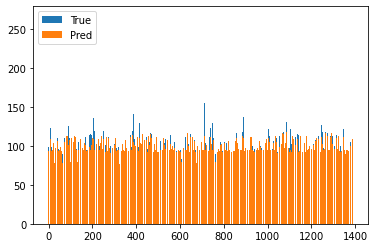

In [ ]:
from matplotlib import pyplot as plt
y_test = y_test.reset_index(drop=True)

x = np.arange(0, len(y_test))

plt.bar(x, y_test, label = 'True')
plt.bar(x, predicted_y_tuner, label = 'Pred')
plt.legend()

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/20
36/36 [==============================] - 1s 13ms/step - loss: 6588.1826 - mae: 77.8188 - val_loss: 1334.4495 - val_mae: 33.6750
Epoch 2/20
36/36 [==============================] - 0s 4ms/step - loss: 356.3893 - mae: 14.5082 - val_loss: 160.8679 - val_mae: 9.0809
Epoch 3/20
36/36 [==============================] - 0s 5ms/step - loss: 101.5566 - mae: 7.1504 - val_loss: 97.9272 - val_mae: 7.0877
Epoch 4/20
36/36 [==============================] - 0s 4ms/step - loss: 74.8894 - mae: 6.1550 - val_loss: 90.6750 - val_mae: 6.7322
Epoch 5/20
36/36 [==============================] - 0s 4ms/step - loss: 65.1734 - mae: 5.6338 - val_loss: 88.7026 - val_mae: 6.5810
Epoch 6/20
36/36 [==============================] - 0s 4ms/step - loss: 61.0886 - mae: 5.5768 - val_loss: 88.9753 - val_mae: 6.4825
Epoch 7/20
36/36 [==============================] - 0s 4ms/step - loss: 57.0195 - mae: 5.2385 - val_loss: 86.8391 - val_mae: 6.4287
Epoch 8/20
36/36 [==============================] - 0s 4ms/step -

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               93440     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 126,465
Trainable params: 126,465
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
pred = model.predict(X_test)

In [ ]:
y_test = y_test.reset_index(drop=True)
diff = np.array([])

for i in np.arange(0, len(y_test)):
  diff = np.append(diff, np.abs(pred[i][0] - y_test[i]))

In [ ]:
diff

array([ 0.12791687,  1.64975342,  5.56705658, ..., 10.21082703,
        3.67911041, 23.8533252 ])

In [ ]:
print("Предсказанное время: ",pred[12][0],", правильное время: ", y_test[12])

Предсказанное время:  94.768906 , правильное время:  90.01


In [ ]:
vec = np.array([])
for i in np.arange(0,len(pred)):
  vec = np.append(vec,pred[i][0])
  vec

In [ ]:
vec

array([ 98.06791687,  98.05975342, 111.39705658, ..., 100.30082703,
       112.79911041,  92.2166748 ])

In [ ]:
mae = 0
for i in np.arange(0,len(y_test)):
  print("Предсказанное время:",pred[i],", правильное время: ", y_test[i], ", разница: ", np.abs(pred[i][0] - y_test[i]))
  mae = np.abs(pred[i][0] - y_test[i]) + mae
  final_mae = mae/842
  final_mae

Предсказанное время: [98.06792] , правильное время:  97.94 , разница:  0.12791687011718977
Предсказанное время: [98.05975] , правильное время:  96.41 , разница:  1.6497534179687534
Предсказанное время: [111.39706] , правильное время:  105.83 , разница:  5.5670565795898455
Предсказанное время: [74.510254] , правильное время:  79.09 , разница:  4.579746093750003
Предсказанное время: [108.454475] , правильное время:  108.69 , разница:  0.23552459716796648
Предсказанное время: [98.354774] , правильное время:  94.6 , разница:  3.754774475097662
Предсказанное время: [96.30784] , правильное время:  84.48 , разница:  11.827838439941402
Предсказанное время: [103.55585] , правильное время:  110.24 , разница:  6.684152832031245
Предсказанное время: [100.94012] , правильное время:  120.8 , разница:  19.85988311767578
Предсказанное время: [109.849686] , правильное время:  122.66 , разница:  12.810314331054684
Предсказанное время: [80.62587] , правильное время:  85.94 , разница:  5.314130249023435
П

In [ ]:
final_mae

11.395262782262233

In [ ]:
CC_tuner = np.corrcoef(vec, y_test)
CC_tuner = CC_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {CC_tuner}')

Коэффициент корреляции с истинными данными: 0.574839926937342
